In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class PolicyNet(nn.Module):
    def __init__(self):
        super(PolicyNet, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 4)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.softmax(x, dim=1)
        return x

# 모델 인스턴스 생성
policy_net = PolicyNet()

# 임의의 입력 생성
test_input = torch.rand(1, 2)  # 1x2 크기의 텐서, 임의의 두 개의 값 포함

# 모델 실행
output = policy_net(test_input)

# 결과 출력
print("Input:", test_input)
print("Output:", output)


Input: tensor([[0.2438, 0.0753]])
Output: tensor([[0.2808, 0.2489, 0.2145, 0.2557]], grad_fn=<SoftmaxBackward0>)


In [ ]:
import numpy as np

# 행동 선택을 위한 확률 분포 예시
cpu_action_probs = [0.1, 0.2, 0.6, 0.1]  # 각 행동에 대한 확률

# 선택된 행동을 기록하기 위한 배열
actions_selected = []

# 100번의 선택을 시뮬레이션
for _ in range(100):
    action = np.random.choice(np.arange(4), p=cpu_action_probs)
    actions_selected.append(action)

# 각 행동이 몇 번 선택되었는지 계산
action_counts = {action: actions_selected.count(action) for action in range(4)}

print("Action probabilities:", cpu_action_probs)
print("Action counts over 100 selections:", action_counts)


Action probabilities: [0.1, 0.2, 0.6, 0.1]
Action counts over 100 selections: {0: 10, 1: 24, 2: 61, 3: 5}


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [ ]:
class Grid:
    def __init__(self, size=5, start_pos=(0, 0), exit_pos=(4, 4)):
        self.size = size
        self.exit_pos = exit_pos
        self.figure_pos = start_pos

    def move(self, direction):
        x, y = self.figure_pos
        if direction == 0 and y > 0:  # up
            self.figure_pos = (x, y-1)
        elif direction == 1 and y < self.size-1:  # down
            self.figure_pos = (x, y+1)
        elif direction == 2 and x > 0:  # left
            self.figure_pos = (x-1, y)
        elif direction == 3 and x < self.size-1:  # right
            self.figure_pos = (x+1, y)

    def is_at_exit(self):
        return self.figure_pos == self.exit_pos

    def get_state(self, device='cpu'):
        return torch.FloatTensor(self.figure_pos).unsqueeze(0).to(device)

class PolicyNet(nn.Module):
    def __init__(self):
        super(PolicyNet, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 4)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.softmax(x, dim=1)
        return x


In [ ]:
def visualize_episode(grid, policy_net, device='cpu', max_episode_len=100):
    state = grid.get_state(device)
    fig, ax = plt.subplots()
    ax.set_xlim(-0.5, grid.size-0.5)
    ax.set_ylim(-0.5, grid.size-0.5)
    ax.set_xticks(np.arange(-0.5, grid.size, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, grid.size, 1), minor=True)
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
    ax.set_aspect('equal')

    for i in range(grid.size):
        for j in range(grid.size):
            if (i, j) == grid.exit_pos:
                ax.text(i, j, 'Exit', ha='center', va='center', color='green')

    policy_net.eval()
    with torch.no_grad():
        for step in range(max_episode_len):
            action_probs = policy_net(state).squeeze()
            log_probs = torch.log(action_probs)
            cpu_action_probs = action_probs.detach().cpu().numpy()
            action = np.random.choice(np.arange(4), p=cpu_action_probs)

            grid.move(action)
            next_state = grid.get_state(device)
            reward = -0.1 if not grid.is_at_exit() else 0

            ax.plot(*grid.figure_pos, 'bo')  # Draw the agent position
            plt.pause(0.5)  # Pause to show updates

            if reward == 0 or grid.is_at_exit():
                break

            state = next_state

    plt.show()


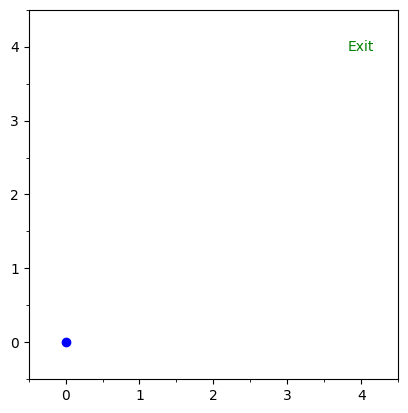

KeyboardInterrupt: 

In [ ]:
grid = Grid(size=5, start_pos=(0, 0), exit_pos=(4, 4))
policy_net = PolicyNet()
visualize_episode(grid, policy_net)


In [ ]:
!pip install imageio imageio-ffmpeg matplotlib

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import imageio

class Grid:
    def __init__(self, size=5, start_pos=(0, 0), exit_pos=(4, 4)):
        self.size = size
        self.exit_pos = exit_pos
        self.figure_pos = start_pos

    def move(self, direction):
        x, y = self.figure_pos
        if direction == 0 and y > 0:  # up
            self.figure_pos = (x, y-1)
        elif direction == 1 and y < self.size-1:  # down
            self.figure_pos = (x, y+1)
        elif direction == 2 and x > 0:  # left
            self.figure_pos = (x-1, y)
        elif direction == 3 and x < self.size-1:  # right
            self.figure_pos = (x+1, y)

    def is_at_exit(self):
        return self.figure_pos == self.exit_pos

    def get_state(self, device='cpu'):
        return torch.FloatTensor(self.figure_pos).unsqueeze(0).to(device)

class PolicyNet(nn.Module):
    def __init__(self):
        super(PolicyNet, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 4)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.softmax(x, dim=1)
        return x

def visualize_episode(grid, policy_net, device='cpu', max_episode_len=100):
    frames = []  # Store each frame here to make a video
    policy_net.eval()

    with torch.no_grad():
        for step in range(max_episode_len):
            plt.figure(figsize=(5, 5))
            plt.xticks([])
            plt.yticks([])
            plt.imshow(np.zeros((grid.size, grid.size)), cmap='gray', vmin=0, vmax=1)
            plt.text(grid.exit_pos[0], grid.exit_pos[1], 'Exit', ha='center', va='center', color='g', fontsize=12)
            plt.text(grid.figure_pos[0], grid.figure_pos[1], 'Agent', ha='center', va='center', color='b', fontsize=12)
            plt.grid('on')
            plt.title(f"Step: {step+1}")

            # Capture the plot as an image
            plt.savefig('frame.png')
            plt.close()
            frames.append(imageio.imread('frame.png'))

            state = grid.get_state(device)
            action_probs = policy_net(state).squeeze()
            action = np.random.choice(np.arange(4), p=action_probs.detach().cpu().numpy())
            grid.move(action)
            if grid.is_at_exit():
                break

    # Create a GIF
    imageio.mimsave('game_progress.gif', frames, fps=1)

    # Create an MP4 video
    imageio.mimsave('game_progress.mp4', frames, fps=1)

# Example Usage
grid = Grid(size=5, start_pos=(0, 0), exit_pos=(4, 4))
policy_net = PolicyNet()
visualize_episode(grid, policy_net)


<ipython-input-16-e3bae8a88aa8>:61: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread('frame.png'))


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import imageio

class Grid:
    def __init__(self, size=5, start_pos=(0, 0), exit_pos=(4, 4)):
        self.size = size
        self.exit_pos = exit_pos
        self.figure_pos = start_pos

    def move(self, direction):
        x, y = self.figure_pos
        if direction == 0 and y > 0:  # up
            self.figure_pos = (x, y-1)
        elif direction == 1 and y < self.size-1:  # down
            self.figure_pos = (x, y+1)
        elif direction == 2 and x > 0:  # left
            self.figure_pos = (x-1, y)
        elif direction == 3 and x < self.size-1:  # right
            self.figure_pos = (x+1, y)

    def is_at_exit(self):
        return self.figure_pos == self.exit_pos

    def get_state(self, device='cpu'):
        return torch.FloatTensor(self.figure_pos).unsqueeze(0).to(device)

class PolicyNet(nn.Module):
    def __init__(self):
        super(PolicyNet, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 4)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.softmax(x, dim=1)
        return x

def visualize_episode(grid, policy_net, device='cpu', max_episode_len=100):
    frames = []  # Store each frame here to make a video
    episode_info = []  # To store episode information

    policy_net.eval()
    with torch.no_grad():
        for step in range(max_episode_len):
            plt.figure(figsize=(5, 5))
            plt.xticks([])
            plt.yticks([])
            plt.imshow(np.zeros((grid.size, grid.size)), cmap='gray', vmin=0, vmax=1)
            plt.text(grid.exit_pos[0], grid.exit_pos[1], 'Exit', ha='center', va='center', color='green', fontsize=12)
            plt.text(grid.figure_pos[0], grid.figure_pos[1], 'Agent', ha='center', va='center', color='blue', fontsize=12)
            plt.grid(True)
            plt.title(f"Step: {step + 1}")
            plt.savefig('frame.png')
            plt.close()
            frames.append(imageio.imread('frame.png'))

            state = grid.get_state(device)
            action_probs = policy_net(state).squeeze()
            action = np.random.choice(np.arange(4), p=action_probs.detach().cpu().numpy())
            episode_info.append((state.cpu().numpy().tolist(), action))  # Store state and action

            grid.move(action)
            if grid.is_at_exit():
                break

    # Output episode information
    for info in episode_info:
        print(f"State: {info[0]}, Action: {action_probs}")

    # Save the visualized episode
    imageio.mimsave('game_progress.gif', frames, fps=1)
    imageio.mimsave('game_progress.mp4', frames, fps=1)

# Example Usage
grid = Grid(size=5, start_pos=(0, 0), exit_pos=(4, 4))
policy_net = PolicyNet()
visualize_episode(grid, policy_net)


<ipython-input-1-7cc295032133>:60: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread('frame.png'))


State: [[0.0, 0.0]], Action: tensor([0.1404, 0.2229, 0.0406, 0.5961])
State: [[0.0, 0.0]], Action: tensor([0.1404, 0.2229, 0.0406, 0.5961])
State: [[0.0, 0.0]], Action: tensor([0.1404, 0.2229, 0.0406, 0.5961])
State: [[0.0, 0.0]], Action: tensor([0.1404, 0.2229, 0.0406, 0.5961])
State: [[1.0, 0.0]], Action: tensor([0.1404, 0.2229, 0.0406, 0.5961])
State: [[1.0, 1.0]], Action: tensor([0.1404, 0.2229, 0.0406, 0.5961])
State: [[1.0, 2.0]], Action: tensor([0.1404, 0.2229, 0.0406, 0.5961])
State: [[1.0, 3.0]], Action: tensor([0.1404, 0.2229, 0.0406, 0.5961])
State: [[2.0, 3.0]], Action: tensor([0.1404, 0.2229, 0.0406, 0.5961])
State: [[3.0, 3.0]], Action: tensor([0.1404, 0.2229, 0.0406, 0.5961])
State: [[4.0, 3.0]], Action: tensor([0.1404, 0.2229, 0.0406, 0.5961])
State: [[4.0, 3.0]], Action: tensor([0.1404, 0.2229, 0.0406, 0.5961])
